In [43]:
import torch
from torch.autograd import Variable
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from sklearn.datasets import load_digits
from sklearn.datasets import fetch_openml
import random

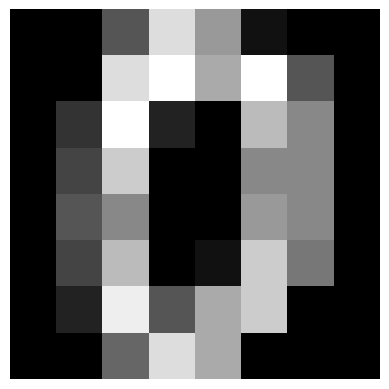

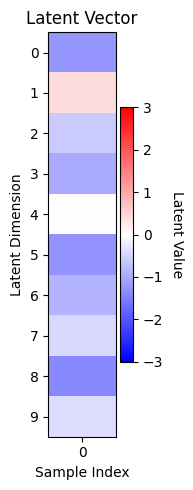

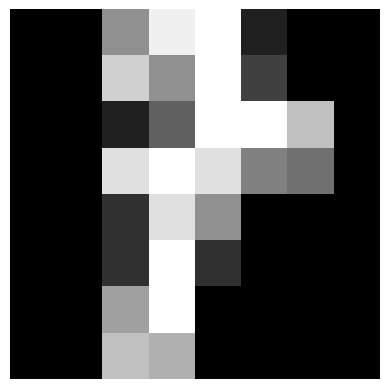

tensor([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10., 15.,
         5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4., 12.,  0.,
         0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.,  0.,  4.,
        11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5., 10., 12.,  0.,  0.,
         0.,  0.,  6., 13., 10.,  0.,  0.,  0.])


In [87]:
class MnistDataset(torch.utils.data.Dataset):
    def __init__(self, data):
        self.data = torch.tensor(data, dtype=torch.float32)

    def __len__(self):
        return self.data.shape[0]

    def __getitem__(self, idx):
        slice_i = self.data[idx]
        return slice_i

def show_bw_image(img_array):
    plt.imshow(img_array.reshape(8,8), cmap='gray')
    plt.axis('off')
    plt.show()

def GenerateLatentData(i):
    latent = torch.randn(i,10)
    return latent

class LatentSpaceDataset(torch.utils.data.Dataset):
    def __init__(self,latents):
        self.latents = latents

    def __len__(self):
        return self.latents.shape[0]

    def __getitem__(self, idx):
        slice_i = self.latents[idx]
        return slice_i

def visualise_latent(z, title="Latent Vector"):

    z = z.detach().cpu().numpy()
    
    # Ensure z has shape (n, 10)
    if z.ndim == 1:
        z = z.reshape(1, -1)
    elif z.shape[1] != 10:
        raise ValueError(f"Expected shape (_, 10), got {z.shape}")

    # Transpose to make latent dimensions vertical
    z = z.T  # shape becomes (10, n)

    fig, ax = plt.subplots(figsize=(max(2, 0.6 * z.shape[1]), 5))
    
    cax = ax.imshow(z, cmap='bwr', aspect='auto', vmin=-3, vmax=3)

    cbar = fig.colorbar(cax, ax=ax, orientation='vertical')
    cbar.set_label('Latent Value', rotation=270, labelpad=15)

    ax.set_title(title)
    ax.set_ylabel("Latent Dimension")
    ax.set_xlabel("Sample Index")
    ax.set_yticks(range(10))
    ax.set_xticks(range(z.shape[1]))
    plt.tight_layout()
    plt.show()


train_dataset = MnistDataset(load_digits().data[:1400])
val_dataset = MnistDataset(load_digits().data[1400:])
show_bw_image(train_dataset[0])

latent_example = GenerateLatentData(1)
visualise_latent(latent_example)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=1, shuffle=False)
show_bw_image(next(iter(train_loader))[0])

print(train_dataset[0])

[0] D Loss: 0.4647 | G Loss: 2.1675


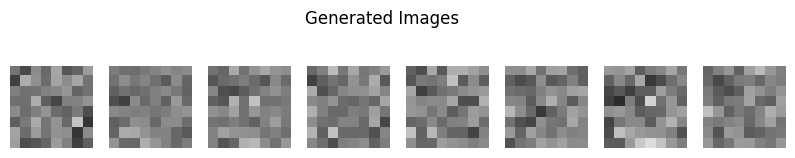

[1] D Loss: 0.4516 | G Loss: 2.7183
[2] D Loss: 0.4279 | G Loss: 3.0798
[3] D Loss: 0.4357 | G Loss: 3.1342
[4] D Loss: 0.4393 | G Loss: 2.9573
[5] D Loss: 0.4613 | G Loss: 3.4950
[6] D Loss: 0.5216 | G Loss: 2.7450
[7] D Loss: 0.5599 | G Loss: 2.5404
[8] D Loss: 0.6375 | G Loss: 2.0817
[9] D Loss: 0.6292 | G Loss: 1.7428
[10] D Loss: 0.6520 | G Loss: 1.7113


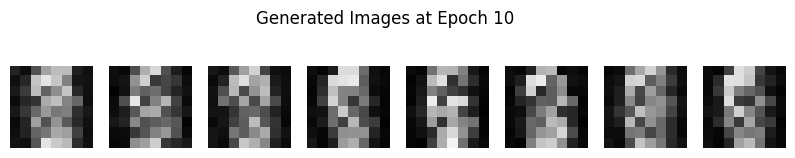

[11] D Loss: 0.6711 | G Loss: 2.1733
[12] D Loss: 0.6924 | G Loss: 1.5632
[13] D Loss: 0.7264 | G Loss: 1.7347
[14] D Loss: 0.7188 | G Loss: 1.5743
[15] D Loss: 0.7863 | G Loss: 1.7296
[16] D Loss: 0.8282 | G Loss: 1.5133
[17] D Loss: 0.8700 | G Loss: 1.1961
[18] D Loss: 0.8607 | G Loss: 1.3915
[19] D Loss: 0.9724 | G Loss: 1.3122
[20] D Loss: 1.0140 | G Loss: 1.1733


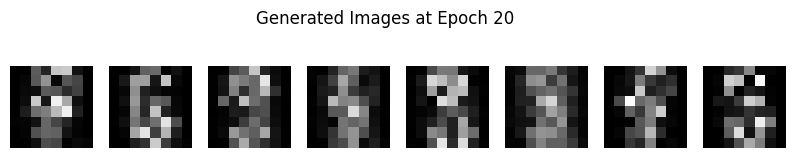

[21] D Loss: 0.9907 | G Loss: 1.0579
[22] D Loss: 0.9224 | G Loss: 1.1680
[23] D Loss: 0.9824 | G Loss: 1.0771
[24] D Loss: 0.9720 | G Loss: 1.0755
[25] D Loss: 0.9734 | G Loss: 1.0072
[26] D Loss: 1.0199 | G Loss: 0.9987
[27] D Loss: 0.9890 | G Loss: 1.1659
[28] D Loss: 0.9441 | G Loss: 1.0386
[29] D Loss: 0.9436 | G Loss: 1.0814
[30] D Loss: 0.9008 | G Loss: 1.0121


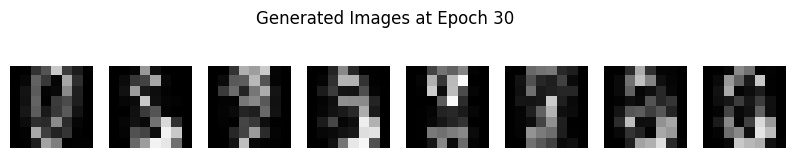

[31] D Loss: 0.9214 | G Loss: 1.0887
[32] D Loss: 0.8724 | G Loss: 1.0312
[33] D Loss: 0.9624 | G Loss: 0.9951
[34] D Loss: 0.9568 | G Loss: 1.0291
[35] D Loss: 0.8828 | G Loss: 1.0216
[36] D Loss: 0.9220 | G Loss: 0.9520
[37] D Loss: 0.9329 | G Loss: 1.1031
[38] D Loss: 0.9106 | G Loss: 1.0237
[39] D Loss: 0.8845 | G Loss: 1.0617
[40] D Loss: 0.9626 | G Loss: 1.0351


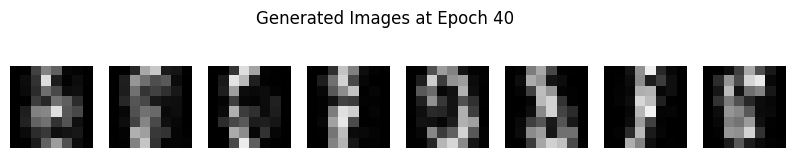

[41] D Loss: 0.9569 | G Loss: 1.1155
[42] D Loss: 0.9722 | G Loss: 1.0010
[43] D Loss: 0.9386 | G Loss: 1.0615
[44] D Loss: 1.0095 | G Loss: 0.8857
[45] D Loss: 1.0129 | G Loss: 0.9465
[46] D Loss: 1.0415 | G Loss: 0.9247
[47] D Loss: 1.0754 | G Loss: 1.0731
[48] D Loss: 1.0787 | G Loss: 1.0152
[49] D Loss: 1.0404 | G Loss: 1.1352
[50] D Loss: 1.0836 | G Loss: 1.0308


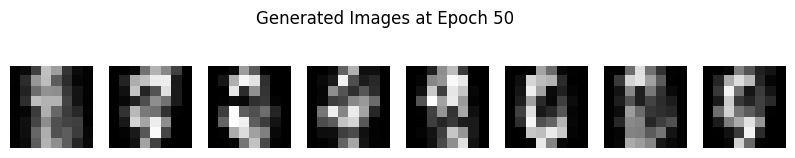

[51] D Loss: 1.1045 | G Loss: 0.8749
[52] D Loss: 1.1165 | G Loss: 1.1005
[53] D Loss: 1.1118 | G Loss: 1.0152
[54] D Loss: 1.1181 | G Loss: 0.9503
[55] D Loss: 1.1335 | G Loss: 1.0141
[56] D Loss: 1.1158 | G Loss: 1.1319
[57] D Loss: 1.1537 | G Loss: 1.3697
[58] D Loss: 1.0773 | G Loss: 1.0585
[59] D Loss: 1.0997 | G Loss: 1.0983
[60] D Loss: 1.0558 | G Loss: 1.0707


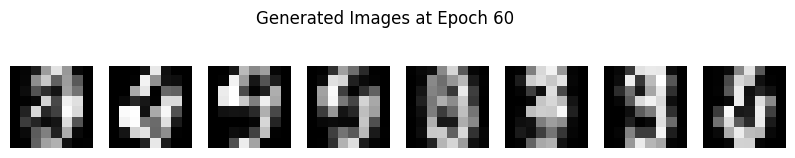

[61] D Loss: 1.1428 | G Loss: 1.0715
[62] D Loss: 1.0477 | G Loss: 1.0730
[63] D Loss: 1.1461 | G Loss: 0.9854
[64] D Loss: 1.1326 | G Loss: 0.9603
[65] D Loss: 1.0723 | G Loss: 1.1680
[66] D Loss: 1.0981 | G Loss: 1.0181
[67] D Loss: 1.2276 | G Loss: 0.9037
[68] D Loss: 1.0970 | G Loss: 0.9301
[69] D Loss: 1.1369 | G Loss: 1.0518
[70] D Loss: 1.1344 | G Loss: 1.0307


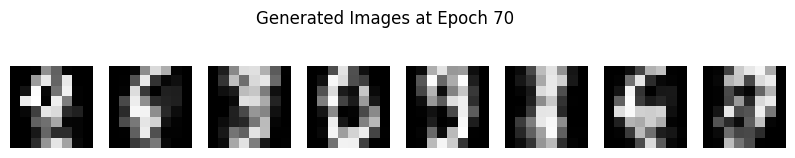

[71] D Loss: 1.1213 | G Loss: 0.9916
[72] D Loss: 1.1966 | G Loss: 0.8445
[73] D Loss: 1.1826 | G Loss: 0.9738
[74] D Loss: 1.0817 | G Loss: 1.1263
[75] D Loss: 1.0833 | G Loss: 0.9688
[76] D Loss: 1.1461 | G Loss: 1.2145
[77] D Loss: 1.1788 | G Loss: 1.0661
[78] D Loss: 1.1062 | G Loss: 1.1051
[79] D Loss: 1.1314 | G Loss: 1.0510
[80] D Loss: 1.1394 | G Loss: 1.0179


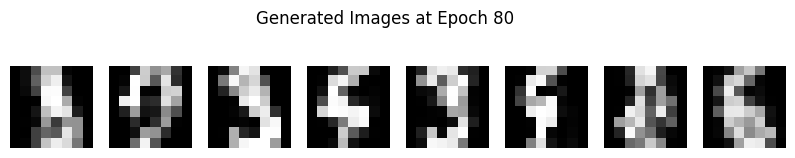

[81] D Loss: 1.0681 | G Loss: 1.1567
[82] D Loss: 1.1367 | G Loss: 0.8846
[83] D Loss: 1.1604 | G Loss: 1.0612
[84] D Loss: 1.0699 | G Loss: 1.0269
[85] D Loss: 1.1549 | G Loss: 0.9209
[86] D Loss: 1.1239 | G Loss: 1.1238
[87] D Loss: 1.1195 | G Loss: 1.1196
[88] D Loss: 1.1194 | G Loss: 1.2263
[89] D Loss: 1.0791 | G Loss: 1.0985
[90] D Loss: 1.1632 | G Loss: 0.9706


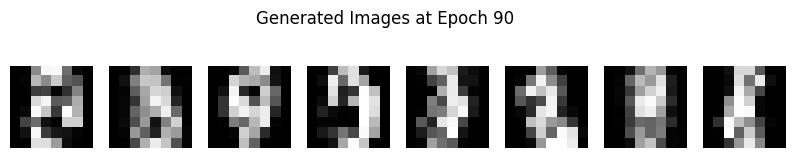

[91] D Loss: 1.1538 | G Loss: 1.2099
[92] D Loss: 1.1673 | G Loss: 0.9735
[93] D Loss: 1.1721 | G Loss: 0.9716
[94] D Loss: 1.1280 | G Loss: 1.0879
[95] D Loss: 1.1190 | G Loss: 0.8887
[96] D Loss: 1.1298 | G Loss: 0.9702
[97] D Loss: 1.0618 | G Loss: 1.1718
[98] D Loss: 1.0951 | G Loss: 1.0125
[99] D Loss: 1.1628 | G Loss: 1.1018


In [89]:
class ScaleFromTanh(nn.Module):
    def __init__(self, min_val=0.0, max_val=16.0):
        super().__init__()
        self.min = min_val
        self.max = max_val

    def forward(self, x):
        # Convert [-1, 1] to [0, 1] first, then scale to [min, max]
        x = (x + 1) / 2  # now in [0, 1]
        return x * (self.max - self.min) + self.min

class simple_generator(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(10, 128),
            nn.LeakyReLU(0.2),
            nn.Linear(128, 64),
            nn.Tanh(),
            ScaleFromTanh(0, 16)
        )

    def forward(self, z):
        return self.net(z)

class tchad_discriminator(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(64, 128),
            nn.LeakyReLU(0.2),
            nn.Linear(128, 1)
        )

    def forward(self, x):
        return self.net(x)

# def weights_init(m):
#     if isinstance(m, nn.Linear):
#         nn.init.xavier_uniform_(m.weight)
#         nn.init.zeros_(m.bias)

def visualise_prediction(generator, epoch=None, n=8):
    generator.eval()
    z = torch.randn(n, 10)
    with torch.no_grad():
        samples = generator(z).view(-1, 8, 8)
    fig, axes = plt.subplots(1, n, figsize=(10, 2))
    for img, ax in zip(samples, axes):
        ax.imshow(img, cmap="gray", vmin=0, vmax=16)
        ax.axis('off')
    plt.suptitle(f"Generated Images {f'at Epoch {epoch}' if epoch else ''}")
    plt.show()

 

gen = simple_generator().to(device)
dis = tchad_discriminator().to(device)
# gen.apply(weights_init)
# dis.apply(weights_init)

opt_G = torch.optim.Adam(gen.parameters(), lr=0.0002, betas=(0.5, 0.999))
opt_D = torch.optim.Adam(dis.parameters(), lr=0.0002, betas=(0.5, 0.999))
loss_fn = nn.BCEWithLogitsLoss()

for epoch in range(epochs):
    for real_image in train_loader:
        real_image = real_image.to(device)
        batch_size = real_image.size(0)

        real_labels = torch.full((batch_size, 1), 0.9, device=device)
        fake_labels = torch.zeros((batch_size, 1), device=device)

        # Train Discriminator
        z = torch.randn(batch_size, 10).to(device)
        fake_images = gen(z).detach()
        d_loss_real = loss_fn(dis(real_image), real_labels)
        d_loss_fake = loss_fn(dis(fake_images), fake_labels)
        d_loss = d_loss_real + d_loss_fake

        opt_D.zero_grad()
        d_loss.backward()
        opt_D.step()

        # Train Generator
        z = torch.randn(batch_size, 10).to(device)
        g_images = gen(z)
        g_loss = loss_fn(dis(g_images), real_labels)

        opt_G.zero_grad()
        g_loss.backward()
        opt_G.step()

    print(f"[{epoch}] D Loss: {d_loss.item():.4f} | G Loss: {g_loss.item():.4f}")
    if epoch % 10 == 0:
        visualise_prediction(gen, epoch)


Epoch 1/100 | D Loss: 1.3892 | G Loss: 0.5626


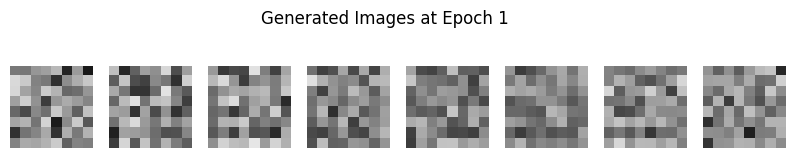

Epoch 2/100 | D Loss: 1.2272 | G Loss: 0.6016
Epoch 3/100 | D Loss: 1.1635 | G Loss: 0.6360
Epoch 4/100 | D Loss: 1.1038 | G Loss: 0.6469
Epoch 5/100 | D Loss: 1.0689 | G Loss: 0.6335
Epoch 6/100 | D Loss: 1.2560 | G Loss: 0.5950
Epoch 7/100 | D Loss: 1.2616 | G Loss: 0.6785
Epoch 8/100 | D Loss: 1.3107 | G Loss: 0.6084
Epoch 9/100 | D Loss: 1.3084 | G Loss: 0.5848
Epoch 10/100 | D Loss: 1.3005 | G Loss: 0.6557


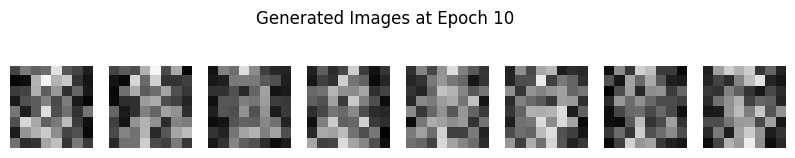

Epoch 11/100 | D Loss: 1.2051 | G Loss: 0.6715
Epoch 12/100 | D Loss: 1.3398 | G Loss: 0.6818
Epoch 13/100 | D Loss: 1.3383 | G Loss: 0.7371
Epoch 14/100 | D Loss: 1.3136 | G Loss: 0.7128
Epoch 15/100 | D Loss: 1.3026 | G Loss: 0.7385
Epoch 16/100 | D Loss: 1.2402 | G Loss: 0.7163
Epoch 17/100 | D Loss: 1.2622 | G Loss: 0.7752
Epoch 18/100 | D Loss: 1.1403 | G Loss: 0.7651
Epoch 19/100 | D Loss: 1.2197 | G Loss: 0.8319
Epoch 20/100 | D Loss: 1.3205 | G Loss: 0.8164


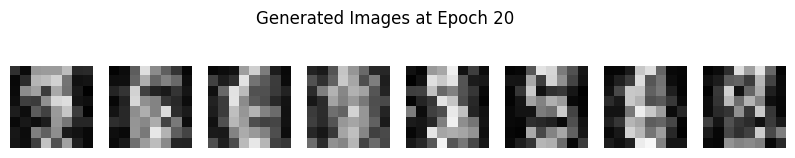

Epoch 21/100 | D Loss: 1.1703 | G Loss: 0.7850
Epoch 22/100 | D Loss: 1.1984 | G Loss: 0.8029
Epoch 23/100 | D Loss: 1.1992 | G Loss: 0.8047
Epoch 24/100 | D Loss: 1.1935 | G Loss: 0.7915
Epoch 25/100 | D Loss: 1.2261 | G Loss: 0.8311
Epoch 26/100 | D Loss: 1.2640 | G Loss: 0.7105
Epoch 27/100 | D Loss: 1.2814 | G Loss: 0.7852
Epoch 28/100 | D Loss: 1.2344 | G Loss: 0.7567
Epoch 29/100 | D Loss: 1.2624 | G Loss: 0.7976
Epoch 30/100 | D Loss: 1.2852 | G Loss: 0.9018


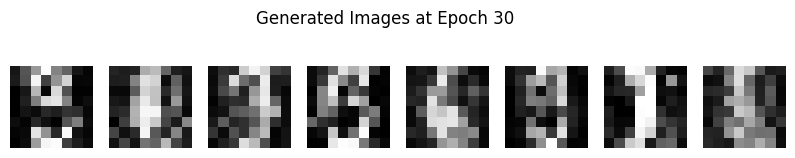

Epoch 31/100 | D Loss: 1.2969 | G Loss: 0.8566
Epoch 32/100 | D Loss: 1.2453 | G Loss: 0.8028
Epoch 33/100 | D Loss: 1.2945 | G Loss: 0.8287
Epoch 34/100 | D Loss: 1.2106 | G Loss: 0.8304
Epoch 35/100 | D Loss: 1.1909 | G Loss: 0.7977
Epoch 36/100 | D Loss: 1.2651 | G Loss: 0.8025
Epoch 37/100 | D Loss: 1.2793 | G Loss: 0.8325
Epoch 38/100 | D Loss: 1.2504 | G Loss: 0.7953
Epoch 39/100 | D Loss: 1.3056 | G Loss: 0.8040
Epoch 40/100 | D Loss: 1.2306 | G Loss: 0.8622


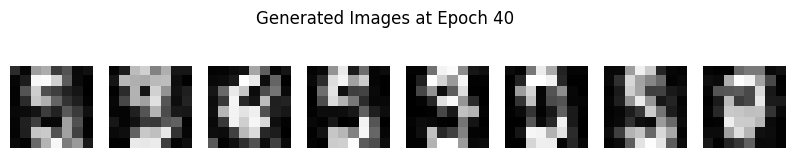

Epoch 41/100 | D Loss: 1.2375 | G Loss: 0.8153
Epoch 42/100 | D Loss: 1.2977 | G Loss: 0.7909
Epoch 43/100 | D Loss: 1.2552 | G Loss: 0.7817
Epoch 44/100 | D Loss: 1.2262 | G Loss: 0.7959
Epoch 45/100 | D Loss: 1.2256 | G Loss: 0.8793
Epoch 46/100 | D Loss: 1.3286 | G Loss: 0.8417
Epoch 47/100 | D Loss: 1.2669 | G Loss: 0.8853
Epoch 48/100 | D Loss: 1.3252 | G Loss: 0.8144
Epoch 49/100 | D Loss: 1.1421 | G Loss: 0.8094
Epoch 50/100 | D Loss: 1.2631 | G Loss: 0.8108


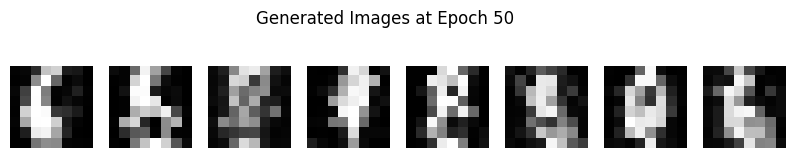

Epoch 51/100 | D Loss: 1.2635 | G Loss: 0.8389
Epoch 52/100 | D Loss: 1.4048 | G Loss: 0.8394
Epoch 53/100 | D Loss: 1.3156 | G Loss: 0.8519
Epoch 54/100 | D Loss: 1.3624 | G Loss: 0.7978
Epoch 55/100 | D Loss: 1.2142 | G Loss: 0.7981
Epoch 56/100 | D Loss: 1.2893 | G Loss: 0.8033
Epoch 57/100 | D Loss: 1.3514 | G Loss: 0.8282
Epoch 58/100 | D Loss: 1.3474 | G Loss: 0.8232
Epoch 59/100 | D Loss: 1.3358 | G Loss: 0.7447
Epoch 60/100 | D Loss: 1.3109 | G Loss: 0.8133


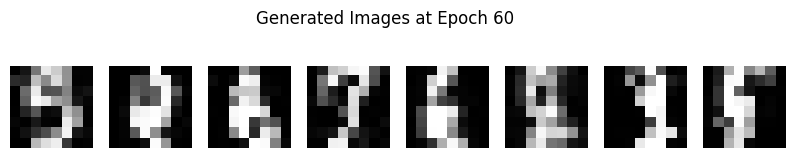

Epoch 61/100 | D Loss: 1.3309 | G Loss: 0.7701
Epoch 62/100 | D Loss: 1.2392 | G Loss: 0.8211
Epoch 63/100 | D Loss: 1.3862 | G Loss: 0.8472
Epoch 64/100 | D Loss: 1.2864 | G Loss: 0.7348
Epoch 65/100 | D Loss: 1.2673 | G Loss: 0.8917
Epoch 66/100 | D Loss: 1.2292 | G Loss: 0.7960
Epoch 67/100 | D Loss: 1.3149 | G Loss: 0.8224
Epoch 68/100 | D Loss: 1.3291 | G Loss: 0.8302
Epoch 69/100 | D Loss: 1.2828 | G Loss: 0.8602
Epoch 70/100 | D Loss: 1.2208 | G Loss: 0.8328


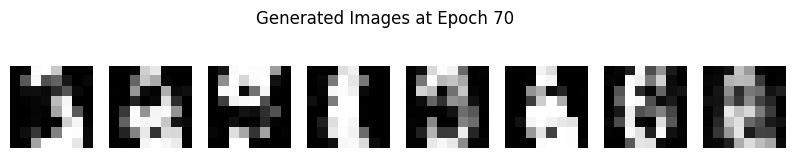

Epoch 71/100 | D Loss: 1.3189 | G Loss: 0.7914
Epoch 72/100 | D Loss: 1.2886 | G Loss: 0.7914
Epoch 73/100 | D Loss: 1.1802 | G Loss: 0.8259
Epoch 74/100 | D Loss: 1.3928 | G Loss: 0.8400
Epoch 75/100 | D Loss: 1.2718 | G Loss: 0.8363
Epoch 76/100 | D Loss: 1.2684 | G Loss: 0.8128
Epoch 77/100 | D Loss: 1.4207 | G Loss: 0.7864
Epoch 78/100 | D Loss: 1.3322 | G Loss: 0.7956
Epoch 79/100 | D Loss: 1.3306 | G Loss: 0.9044
Epoch 80/100 | D Loss: 1.2689 | G Loss: 0.8178


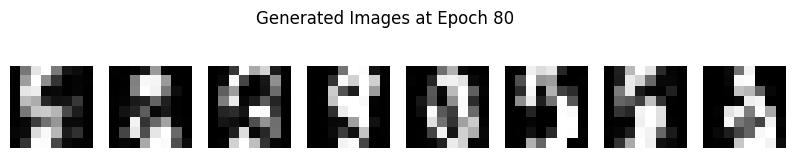

Epoch 81/100 | D Loss: 1.2783 | G Loss: 0.7995
Epoch 82/100 | D Loss: 1.3287 | G Loss: 0.7504
Epoch 83/100 | D Loss: 1.4127 | G Loss: 0.7995
Epoch 84/100 | D Loss: 1.4451 | G Loss: 0.8321
Epoch 85/100 | D Loss: 1.2258 | G Loss: 0.8125
Epoch 86/100 | D Loss: 1.3787 | G Loss: 0.7765
Epoch 87/100 | D Loss: 1.3354 | G Loss: 0.8161
Epoch 88/100 | D Loss: 1.4275 | G Loss: 0.7622
Epoch 89/100 | D Loss: 1.3735 | G Loss: 0.8238
Epoch 90/100 | D Loss: 1.3415 | G Loss: 0.8141


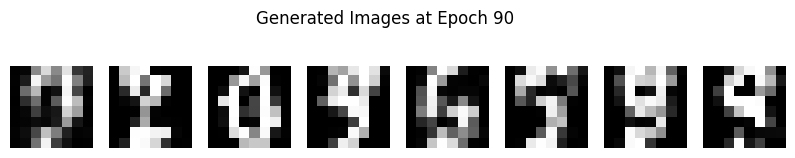

Epoch 91/100 | D Loss: 1.3508 | G Loss: 0.7838
Epoch 92/100 | D Loss: 1.2079 | G Loss: 0.9093
Epoch 93/100 | D Loss: 1.3053 | G Loss: 0.8655
Epoch 94/100 | D Loss: 1.3765 | G Loss: 0.8511
Epoch 95/100 | D Loss: 1.2417 | G Loss: 0.8318
Epoch 96/100 | D Loss: 1.3052 | G Loss: 0.8547
Epoch 97/100 | D Loss: 1.2151 | G Loss: 0.8483
Epoch 98/100 | D Loss: 1.3132 | G Loss: 0.7532
Epoch 99/100 | D Loss: 1.2962 | G Loss: 0.9457
Epoch 100/100 | D Loss: 1.2678 | G Loss: 0.9201


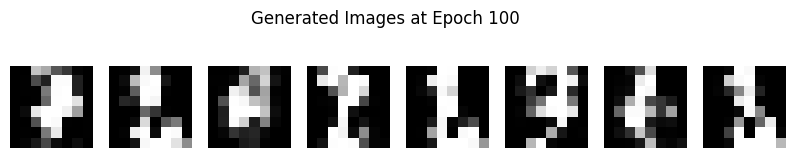

In [71]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import load_digits
from sklearn.preprocessing import MinMaxScaler
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt
import numpy as np

# --- DATA ---
digits = load_digits()
X = MinMaxScaler((-1, 1)).fit_transform(digits.data)
X = torch.tensor(X, dtype=torch.float32)
dataloader = DataLoader(TensorDataset(X), batch_size=64, shuffle=True)

# --- DEVICE ---
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# --- HYPERPARAMETERS ---
z_dim = 20
lr = 0.0002
epochs = 100
label_smoothing = 0.9  # instead of 1.0
noise_std = 0.1

# --- MODELS ---
class Generator(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(z_dim, 128),
            nn.LeakyReLU(0.2),
            nn.Linear(128, 64),
            nn.Tanh()
        )

    def forward(self, z):
        return self.net(z)

class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(64, 128),
            nn.LeakyReLU(0.2),
            nn.Linear(128, 1)
        )

    def forward(self, x):
        return self.net(x)

# --- WEIGHT INIT ---
def weights_init(m):
    if isinstance(m, nn.Linear):
        nn.init.xavier_uniform_(m.weight)
        nn.init.zeros_(m.bias)

G = Generator().to(device)
D = Discriminator().to(device)
G.apply(weights_init)
D.apply(weights_init)

# --- OPTIMIZERS AND LOSS ---
opt_G = optim.Adam(G.parameters(), lr=lr, betas=(0.5, 0.999))
opt_D = optim.Adam(D.parameters(), lr=lr, betas=(0.5, 0.999))
criterion = nn.BCEWithLogitsLoss()

# --- VISUALIZATION FUNCTION ---
def show_generated_images(generator, epoch, n=8):
    generator.eval()
    z = torch.randn(n, z_dim).to(device)
    with torch.no_grad():
        samples = generator(z).cpu().view(-1, 8, 8)
    fig, axes = plt.subplots(1, n, figsize=(10, 2))
    for img, ax in zip(samples, axes):
        ax.imshow(img, cmap="gray", vmin=-1, vmax=1)
        ax.axis('off')
    plt.suptitle(f"Generated Images at Epoch {epoch}")
    plt.show()
    generator.train()

# --- TRAINING LOOP ---
for epoch in range(1, epochs + 1):
    for real_batch, in dataloader:
        real_batch = real_batch.to(device)
        batch_size = real_batch.size(0)

        # Add instance noise to real images
        real_batch += noise_std * torch.randn_like(real_batch)

        # Create labels
        real_labels = torch.full((batch_size, 1), label_smoothing, device=device)
        fake_labels = torch.zeros(batch_size, 1, device=device)

        # Train Discriminator
        z = torch.randn(batch_size, z_dim, device=device)
        fake_data = G(z).detach()
        d_real = D(real_batch)
        d_fake = D(fake_data)
        loss_D_real = criterion(d_real, real_labels)
        loss_D_fake = criterion(d_fake, fake_labels)
        loss_D = loss_D_real + loss_D_fake

        opt_D.zero_grad()
        loss_D.backward()
        opt_D.step()

        # Train Generator
        z = torch.randn(batch_size, z_dim, device=device)
        fake_data = G(z)
        fake_preds = D(fake_data)
        loss_G = criterion(fake_preds, real_labels)

        opt_G.zero_grad()
        loss_G.backward()
        opt_G.step()

    print(f"Epoch {epoch}/{epochs} | D Loss: {loss_D.item():.4f} | G Loss: {loss_G.item():.4f}")
    if epoch % 10 == 0 or epoch == 1:
        show_generated_images(G, epoch)
